In [ ]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

#Samenvatting

### Student $t$-distribution in Python

`import scipy.stats`

For a $t$-distribution with df degrees of freedom: (df = degrees of freedom)  

| **Function**    | **Purpose** |
| :---                     | :--- |
| `stats.t.pdf(x, df=d)`   | Probability density for $x$    |
| `stats.t.cdf(x, df=d)`   | Left-tail probability 𝑃(𝑋 < x) |
| `stats.t.sf(x, df=d)`    | Right-tail probability 𝑃(𝑋 > x)    |
| `stats.t.isf(1-p, df=d)` | p% of observations are expected to be lower than this value    |



H3.03 Statistical Hypothesis Testing

The principle of hypothesis testing is to calculate how likely it is to observe the test statistic (the statistic calculated from the observations) if you assume that the null hypothesis  H0  is true


## z Test of t-Test
The **$z$-test** can only be used under specific conditions:

- The sample needs to be random  
- The sample size needs to be sufficiently large ($n \geq 30$)
- The test statistic needs to have a normal distribution  
- The standard deviation of the population, $\sigma$, is known

Als de onderliggende populatie normaal verdeeld is dan mag de Z-test

Meer concreet: als n < 30 en/of sigma in de populatie is onbekend en als aan de andere voorwaarden om een t-test te gebruiken, is voldaan, moet de t-test gebruikt worden ipv de z-test.

De **t-toets** mag ook onder specifieke voorwaarden gebruikt worden die voor een deel "zwakker" zijn dan voor de z-toets (d.w.z. kunnen in meer omstandigheden gebruikt worden):
- De steekproef moet nog steeds aselect (random) zijn
- De steekproefgrootte mag kleiner zijn dan 30
- De onderzochte variabele zelf moet normaal verdeeld zijn
- De standaardafwijking van de populatie moet niet gekend zijn, je mag de steekproefstandaardafwijking gebruiken als schatter

Jars of jam are filled by a machine. It has been found that the quantity of jam in a jar is normally distributed and has mean 351.2g, with standard deviation 4.1g. It is believed that the settings of the mean amount on the machine might have been altered accidentally. Assume that the standard deviation has not been altered.

To test this a random sample of 40 jars is taken and the mean quantity per jar is calculated. The mean quantity per jar is found to be 352.8g.

Let's first plot the situation:

## The right-tailed $z$-test


In [ ]:

# Properties of the sample:
n = 40              # Sample size
mu = 351.2          # (Hypothetical) population mean
sigma = 4.1         # Population standard deviation (assumed to be known)
m_sample = 352.8    # Sample mean
s_sample = sigma / math.sqrt(n)

The testing procedure then runs as follows:

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 351.2$ (the machine is working correctly)
- $H_1: \mu > 351.2$ (the machine is not working correctly)

**Step 2.** Choose a significance level, e.g. $\alpha = 0.05$

**Step 3.** Determine the value of the test statistic, in this case $\overline{x} = 352.8$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.


In [ ]:
alpha = 0.05 # Significance level chosen by the researcher
p = stats.norm.sf(m_sample, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

p-value: 0.00679
p < alpha: reject H0


An alternative method is to determine the critical region, i.e. the set of all values for the sample mean where $H_0$ may be rejected. The boundary of that area is called the critical value $g$. To the left of it you can't reject $H_0$ (acceptance region), to the right you can (critical region). The area of the acceptance region is $1 - \alpha$, the area of the critical region is $\alpha$.

In [ ]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(alpha, loc=mu, scale=sigma / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 352.266
sample mean = 352.800 > g = 352.266: reject H0


A plot of this case:

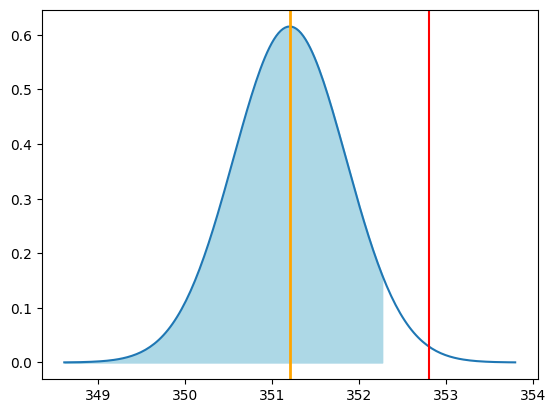

In [ ]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red")
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue');

## The left-tailed $z$-test

Let's assume the mean quantity per jar is found to be 350.4g. In this case we have reasons to assume that the population mean is *lower* than the value we are testing against ($\mu$ = 351.2g). We can verify this with a *left-tailed* $z$-test.

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 351.2$ (the machine is working correctly)
- $H_1: \mu < 351.2$ (the machine is not working correctly)

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

**Step 3.** Calculate the test statistic: $\overline{x} = 350.4$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.

In [ ]:
# Properties of the sample:
n = 40              # Sample size
mu = 351.2          # (Hypothetical) population mean
sigma = 4.1         # Population standard deviation (assumed to be known)
m_sample = 350.4    # Sample mean
alpha = 0.05        # Significance level (chosen by the researcher)

In [ ]:
# Pay attention! Use cdf() instead of sf()! Why?
p = stats.norm.cdf(m_sample, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < a, reject H0")
else:
    print("p > a, do not reject H0")

p-value: 0.10859
p > a, do not reject H0


In this case, the critical value  g  is left of the mean. On the right of  g , you may not reject  H0  (acceptance region), on the left, you can (critical region).

In [ ]:
# Critical value according to the formula in the lecture slides
# g = m0 - stats.norm.isf(a) * s / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(1-alpha, loc=mu, scale=(sigma / np.sqrt(n)))
print("Critical value g ≃ %.3f" % g)
if (m_sample > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 350.134
sample mean = 350.400 > g = 350.134: do not reject H0


A plot of this case:

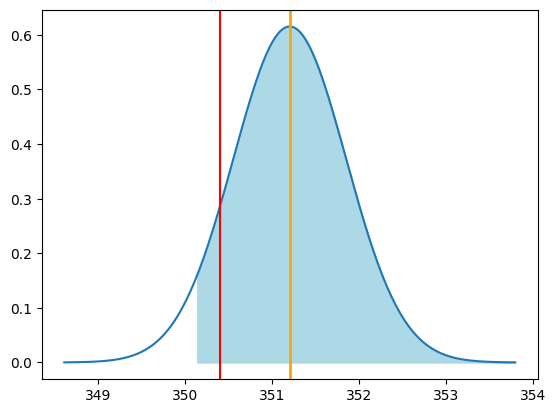

In [ ]:
# Gauss-curve:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue');

In this case, we see that the sample mean (in red) still falls within the acceptance region, so we cannot reject the null hypothesis. This is also confirmed by the  p -value, which is greater than  α . With this result, there is no reason to assume the machine is not working correctly.

## The two-tailed $z$-test

When we don't want to test whether the population mean is either greater or lower than a hypothetical value, but only want to know if the sample mean is "close enough", we can use a two-tailed $z$-test.

**Step 1.** Formulate the hypotheses:

- $H_0: \mu  =  351.2$
- $H_1: \mu \ne 351.2$

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

**Step 3.** Determine the test statistic. Assume the mean quantity per jar is found to be 351.4g.

$$\overline{x} = 351.4$$

**Step 4.** Calculate the $p$-value and reject $H_0$ if $p < \alpha/2$ (why do we divide by 2?).

In [ ]:
# Properties of the sample:
n = 40              # Sample size
mu = 351.2          # (Hypothetical) population mean
sigma = 4.1         # Population standard deviation (assumed to be known)
m_sample = 351.4    # Sample mean
alpha = 0.05        # Significance level (chosen by the researcher)

In [ ]:
p = stats.norm.sf(m_sample, loc=mu, scale=sigma/np.sqrt(n))
print("p-waarde: %.5f" % p)
if(p < alpha/2):
    print("p < alpha/2, reject H0")
else:
    print("p > alpha/2, do not reject H0")

p-waarde: 0.37885
p > alpha/2, do not reject H0


In this case, we have two critical values: $g_1$ on the left of the mean and $g_2$ on the right. The acceptance region still has area $1-\alpha$ and the critical region has area $\alpha$.

In [ ]:
g1 = mu - stats.norm.isf(alpha/2) * sigma / np.sqrt(n)
g2 = mu + stats.norm.isf(alpha/2) * sigma / np.sqrt(n)

print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < m_sample and m_sample < g2):
    print("Sample mean = %.3f is inside acceptance region: do not reject H0" % m_sample)
else:
    print("Sample mean = %.3f is outside acceptance region: reject H0" % m_sample)

Acceptance region [g1, g2] ≃ [349.929, 352.471]
Sample mean = 351.400 is inside acceptance region: do not reject H0


A plot of this case:

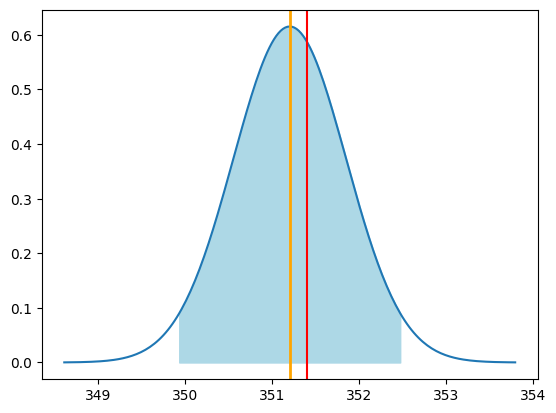

In [ ]:
# Gauss-curve
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=mu, scale=sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
acc_x = np.linspace(g1, g2, num=101)
acc_y = stats.norm.pdf(acc_x, loc=mu, scale=sigma/np.sqrt(n))
# Fill the acceptance region in light blue
dplot.fill_between(acc_x, 0, acc_y, color='lightblue');

**Step 5** Draw conclusions

The obtained sample mean turns out to be sufficiently probable. We cannot rule out a random sampling error. Or, in other words, we *cannot* reject the null hypothesis here. From the sample, we cannot conclude that the machine is not working correctly.

## Student's $t$-test

The $z$-test can only be used under specific conditions:

- The sample needs to be random  
- The sample size needs to be sufficiently large ($n \geq 30$)
- The test statistic needs to have a normal distribution  
- The standard deviation of the population, $\sigma$, is known

Sometimes these assumptions will not hold and in this case we can not use the $z$-test! If the variable is normally distributed, you can use Student's $t$-test.

### Left-tailed T_test

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 80$ (the pulse rates of trained athletes are the same as those of healthy young adults)
- $H_1: \mu < 80$ (the pulse rates of trained athletes are lower than those of healthy young adults)

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

**Step 3.** Calculate the test statistic $\overline{x}$

In [ ]:
pulses = [48, 52, 59, 45, 57, 52, 44, 58, 56, 44, 63, 50]
n = len(pulses)
mu = 80
s = 9
m_sample = np.mean(pulses)
s_sample = np.std(pulses,ddof=1)
alpha = 0.05

print(f"Sample mean: {m_sample}")

Step 4. Determine the  p -value and reject  H0  if  p<α .

In [ ]:
p = stats.t.cdf(m_sample, loc = mu, scale = s / math.sqrt(n), df = n - 1)
#left tailed t test
print(f"p-value: {p}")
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

Or calculate the critical value $g$ and reject $H_0$ if $\overline{x} < g$.

In [ ]:
g = stats.t.isf(1-alpha, loc = mu, scale = s / math.sqrt(n), df = n - 1)
print("Critical value g ≃ %.3f" % g)
if (m_sample > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (m_sample, g))

In [ ]:
# Gauss-curve
# X-values
dist_x = np.linspace(50, 90, num=201)
# Y-values
dist_y = stats.t.pdf(dist_x, loc=mu, scale=s/np.sqrt(n), df=n-1)
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue');

**Step 5** Draw conclusions.

The pulse rate of the trained athletes is well outside of the acceptance region and the $p$-value is very low. No matter what reasonable value we would have chosen for $\alpha$, the $p$-value is lower still. Therefore, we can reject the null hypothesis and conclude that in this sample, there is evidence to conclude that the pulse rates of trained athletes are indeed lower than those of typical healthy young adults.

a two-tailed t-test on a collection of observations:

In [ ]:
pulses = [48, 52, 59, 45, 57, 52, 44, 58, 56, 44, 63, 50]
alpha = 0.05
mu = 80

t_stat, p_val = stats.ttest_1samp(a=pulses, popmean=mu, alternative='less')
print("Sample mean        : %.3f" % np.mean(pulses))
print("t-score            : %.3f" % t_stat)
print(f"p-value           : {p_val}")